<a href="https://colab.research.google.com/github/JuanLara18/Actuarial-DataMined-Provisiones/blob/main/notebooks/Actuarial_Reserving_Analysis_with_Chain_Ladder_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data can be download [here](https://www.casact.org/publications-research/research/research-resources/loss-reserving-data-pulled-naic-schedule-p).

# Data Understanding

We are importing essential libraries and loading a dataset from a CSV file named "wkcomp_pos.csv." These libraries include pandas for data manipulation, matplotlib.pyplot for plotting, seaborn for enhancing data visualization, and numpy for numerical operations. This initial step is crucial for our data analysis and visualization process.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("wkcomp_pos.csv")

### Basic information

Display basic information about the dataset

In [2]:
print("Dataset Information:")
print("Number of Records:", data.shape[0])
print("Number of Attributes:", data.shape[1])

Dataset Information:
Number of Records: 13200
Number of Attributes: 13


Display data types of attributes

In [3]:
print("\nData Types of Attributes:")
print(data.dtypes)


Data Types of Attributes:
GRCODE                int64
GRNAME               object
AccidentYear          int64
DevelopmentYear       int64
DevelopmentLag        int64
IncurLoss_D           int64
CumPaidLoss_D         int64
BulkLoss_D            int64
EarnedPremDIR_D       int64
EarnedPremCeded_D     int64
EarnedPremNet_D       int64
Single                int64
PostedReserve97_D     int64
dtype: object



While exploring the dataset, we noticed that the "GRNAME" variable, categorized as "object," exclusively contains non-numeric values. As expected, all other variables are integers. Upon printing some of the "GRNAME" values, it became clear that they effectively represent company names.

Now, we check unique values and coding schemes for specific attributes

In [4]:
print("\nCoding Schemes:")
print("Number of unique values in 'GRCODE':", len(data['GRCODE'].unique()))
print("Number of unique values in 'GRNAME':", len(data['GRNAME'].unique()))
print("Number of unique values in 'AccidentYear':", len(data['AccidentYear'].unique()))
print("Number of unique values in 'DevelopmentYear':", len(data['DevelopmentYear'].unique()))


Coding Schemes:
Number of unique values in 'GRCODE': 132
Number of unique values in 'GRNAME': 132
Number of unique values in 'AccidentYear': 10
Number of unique values in 'DevelopmentYear': 19


### Variables

We explore the range of the variables

In [5]:
import warnings

integer_columns = data.select_dtypes(include='int64').columns
integer_columns = data.select_dtypes(include='int64').columns
result = pd.DataFrame(columns=['Column Name', 'Min', 'Max'])
warnings.simplefilter(action='ignore', category=FutureWarning)

# Fill the result
for column in integer_columns:
    min_value = data[column].min()
    max_value = data[column].max()
    result = result.append({'Column Name': column, 'Min': min_value, 'Max': max_value}, ignore_index=True)

# Print the table
print(result)

          Column Name    Min      Max
0              GRCODE     86    44300
1        AccidentYear   1988     1997
2     DevelopmentYear   1988     2006
3      DevelopmentLag      1       10
4         IncurLoss_D    -59   367404
5       CumPaidLoss_D   -338   325322
6          BulkLoss_D  -4621   145296
7     EarnedPremDIR_D  -6518   421223
8   EarnedPremCeded_D  -3522    78730
9     EarnedPremNet_D  -9731   418755
10             Single      0        1
11  PostedReserve97_D      0  1090093


### Quality of the data

Now, we perform initial checks for missing values and data types.

In [6]:
missing_values = data.isnull().sum()
data_types = data.dtypes

print(missing_values)

GRCODE               0
GRNAME               0
AccidentYear         0
DevelopmentYear      0
DevelopmentLag       0
IncurLoss_D          0
CumPaidLoss_D        0
BulkLoss_D           0
EarnedPremDIR_D      0
EarnedPremCeded_D    0
EarnedPremNet_D      0
Single               0
PostedReserve97_D    0
dtype: int64


### Statistics

Here we delve into the exploration of the data set for the selected variables.

In [7]:
# Extract de information in DataFrames
Important_Variables = data.columns.delete([0,1,2,3,4,-1,-2,-3,-4,-5])
DataComplete = {column : [] for column in Important_Variables}
size = data.shape[0]

In [8]:
for Variable in Important_Variables:
  count = 0
  while(size - 100*count > 1):
    base_Variable = np.zeros((10,10))
    for i in range(10):
      for j in range(10):
        base_Variable[i][j] = data[Variable][i*10+j + 10*count]
    count = count + 1
    DataComplete[Variable].append(pd.DataFrame(base_Variable))

In [9]:
# Define the function to plot the series
def DrawGraph(x, name):
  matrix = x.values
  plt.figure(figsize=(9, 7))
  plt.plot()

  for i in range(10):
    val = matrix[i]
    for j in range(0):
      val = val[:-1]
    rang = range(1988,1988+len(val))
    plt.plot(rang, val, marker='o', linestyle='-', label=1988+i)

  plt.xlabel('Years')
  plt.ylabel('Value')
  plt.title(name)

  plt.savefig(name, dpi=300, bbox_inches='tight')

  plt.legend()

In [10]:
# Find the basics statistics component by component for each variable
Means_C = {}
for variable, array in DataComplete.items():
  Means_C[variable] = pd.concat(array).groupby(level=0).mean()

Var_C = {}
for variable, array in DataComplete.items():
  Var_C[variable] = pd.concat(array).groupby(level=0).var()

Min_C = {}
for variable, array in DataComplete.items():
  Min_C[variable] = pd.concat(array).groupby(level=0).min()

Max_C = {}
for variable, array in DataComplete.items():
  Max_C[variable] = pd.concat(array).groupby(level=0).max()

Median_C = {}
for variable, array in DataComplete.items():
  Median_C[variable] = pd.concat(array).groupby(level=0).median()

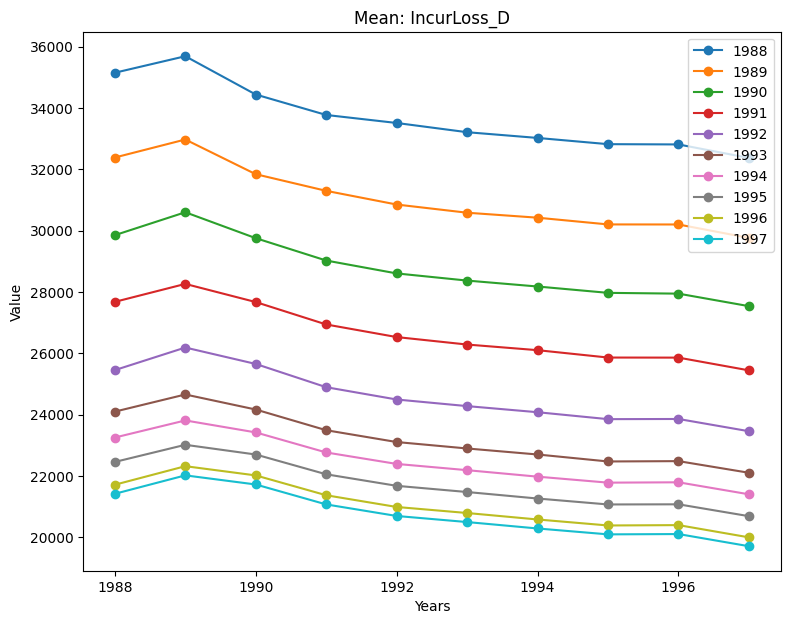

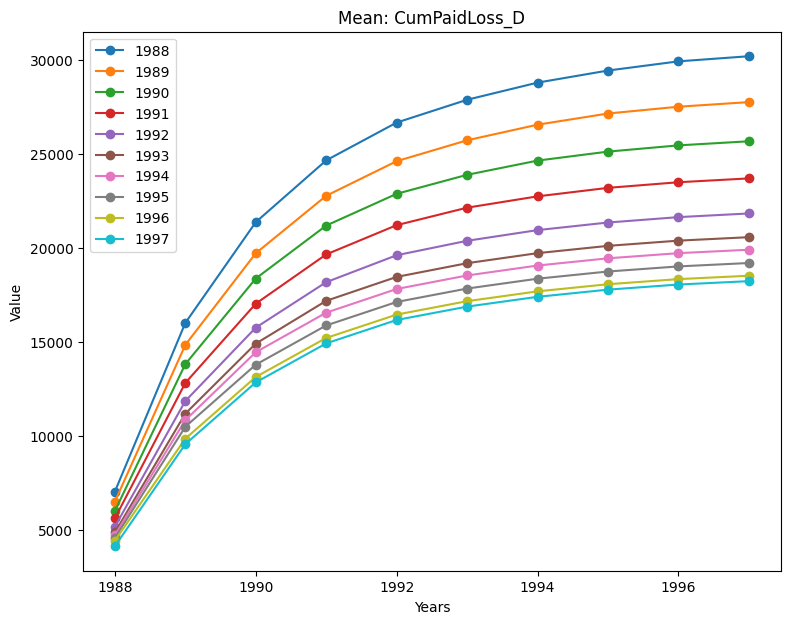

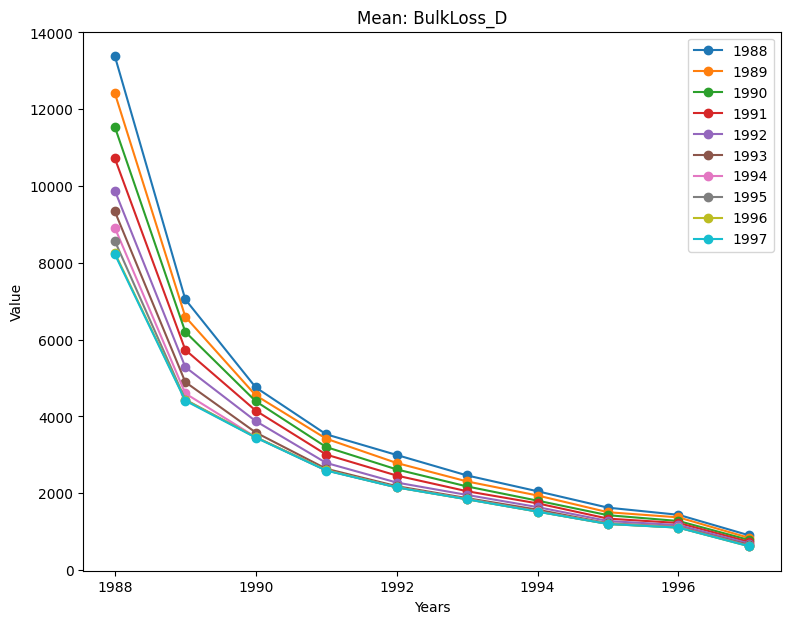

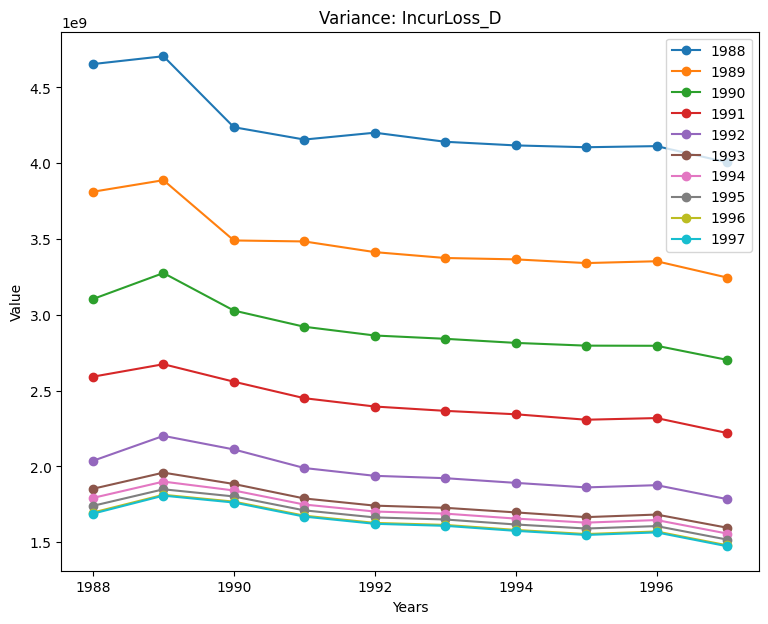

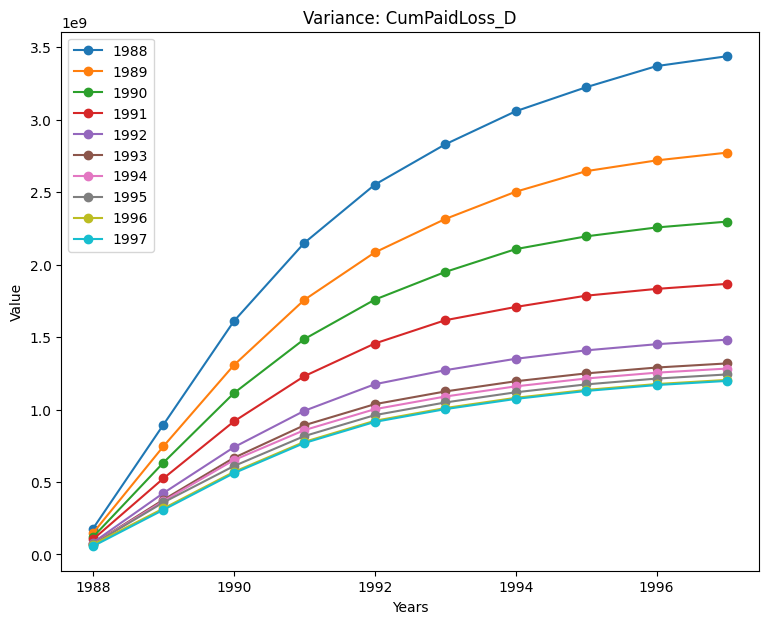

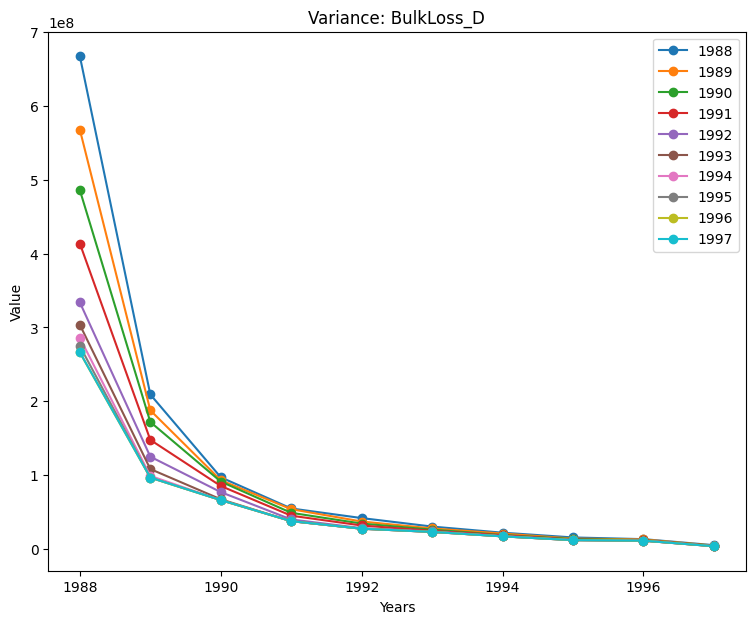

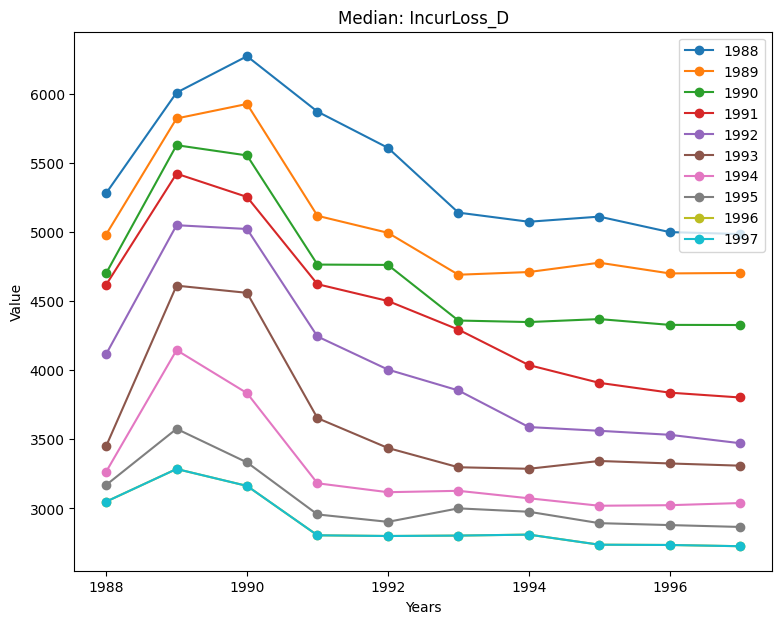

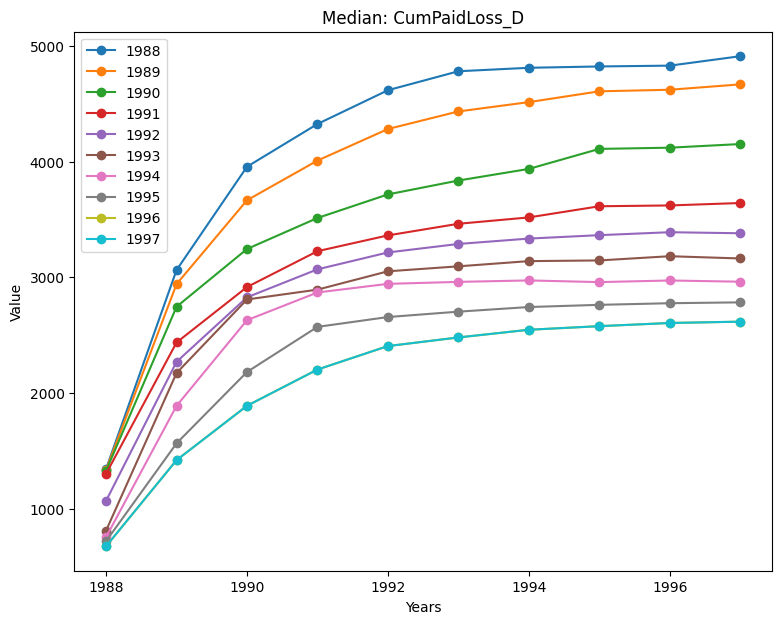

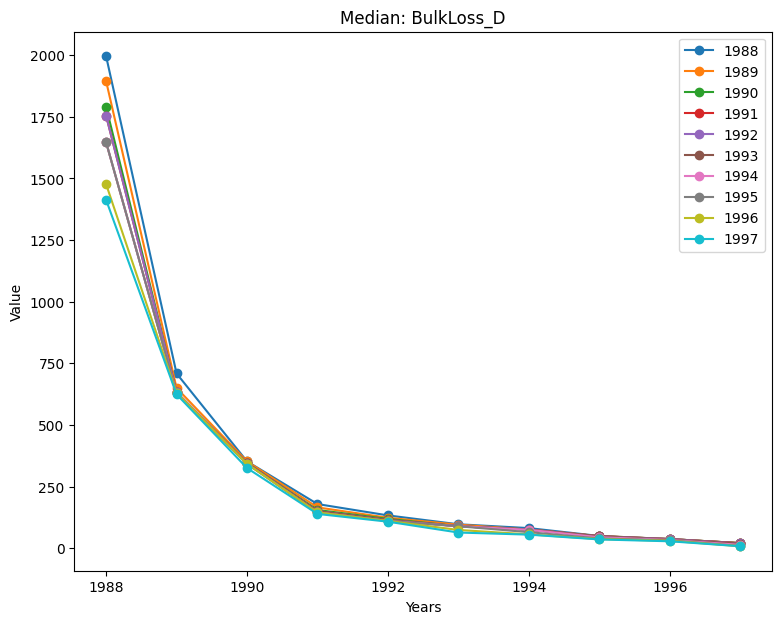

In [11]:
# Export the graphs of the basis statistics
for var in Important_Variables:
  DrawGraph(Means_C[var], 'Mean: ' + var)

for var in Important_Variables:
  DrawGraph(Var_C[var], 'Variance: ' + var)

for var in Important_Variables:
  DrawGraph(Median_C[var], 'Median: ' + var)

We need to understand the context of negative values within the financial columns.

In [12]:
# Check for negative values in the financial columns
relevant_columns = [
    'IncurLoss_D', 'CumPaidLoss_D', 'BulkLoss_D',
    'EarnedPremDIR_D', 'EarnedPremCeded_D', 'EarnedPremNet_D'
]

negative_values_summary = (data[relevant_columns] < 0).sum()
print(negative_values_summary)

IncurLoss_D            5
CumPaidLoss_D         13
BulkLoss_D           165
EarnedPremDIR_D      160
EarnedPremCeded_D    290
EarnedPremNet_D      260
dtype: int64


### Correlation Analysis

To understand the relationships between variables, we examine the correlation matrix.

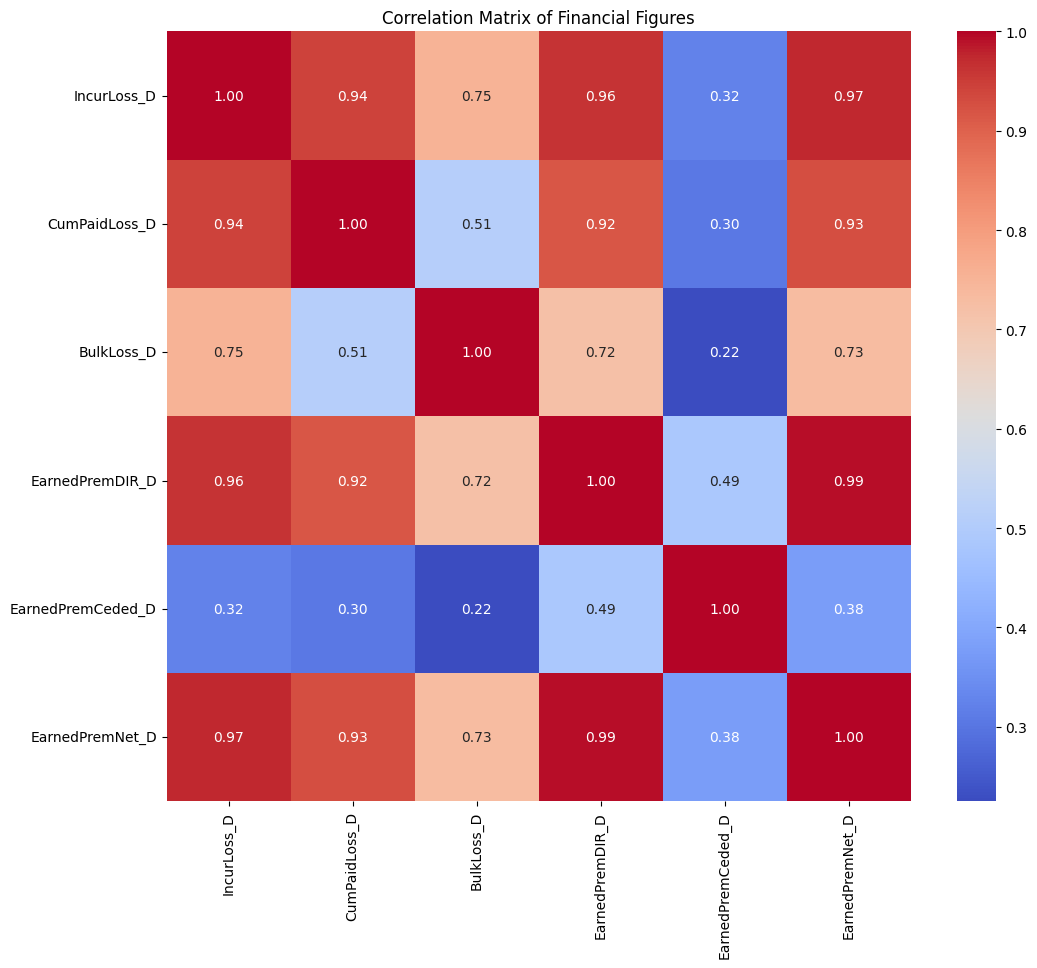

In [13]:
# Generate a correlation matrix
correlation_matrix = data[relevant_columns].corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of Financial Figures')
plt.show()

### Normalization and PCA

In [14]:
# Normalize the numerical data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data[relevant_columns])

# Apply PCA
pca = PCA()
data_pca = pca.fit_transform(data_normalized)

# Explained variance ratio of the PCA components
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[7.61951560e-01 1.43501285e-01 8.60849015e-02 7.58461431e-03
 8.77639488e-04 5.66312733e-13]


The results of the PCA analysis on the selected financial data columns reveal interesting insights into the underlying structure of the dataset. The first principal component explains a substantial 76.20% of the total variance, indicating that it captures the most significant patterns or correlations among the variables. The second and third components, with variances of 14.35% and 8.61%, respectively, also contribute significantly to the overall variance, highlighting additional important relationships within the data. On the other hand, the fourth component explains a smaller proportion (0.76%) of the variance, suggesting that it may not be as crucial in summarizing the dataset's variability. Finally, the fifth and sixth components explain very little variance, with the sixth component almost negligible. These findings provide valuable guidance for dimensionality reduction and feature selection, as the first three components can potentially represent the essential financial patterns while reducing data complexity.

# Data Preparation

We are about to delve into the examination of a single run-off triangle. In this initial phase of our exploration, we will be working with the entirety of the available data. Our objective is to closely observe and gain insights into the characteristics and visual representation of this specific run-off triangle. This comprehensive analysis will provide us with a foundational understanding of its structure and behavior, which will be invaluable as we proceed with our further investigations and analyses.

We already make the selection of the important data for the data analysis and as we already discuss we prefer not to clean the data.

### Construct the Triangles

In [11]:
def IncompleteDataFrame(x):
  y = x.copy()
  matrix = y.values
  for i in range(9,0,-1):
    for j in range(10-i,10,1):
        matrix[i][j] = 0
  return pd.DataFrame(matrix)

Triangles = {}
for variable, array in DataComplete.items():
  Triangles[variable] = [IncompleteDataFrame(x) for x in array]

### Statistics of the triangles

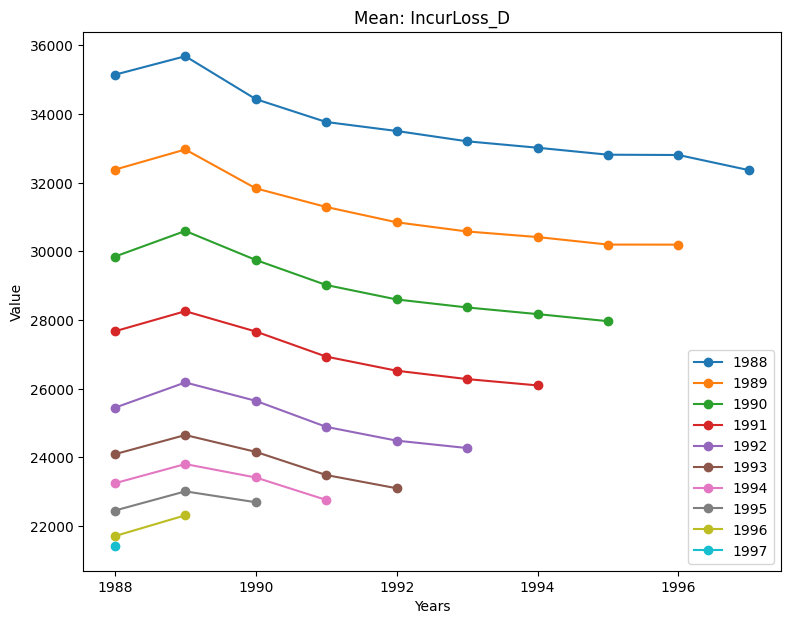

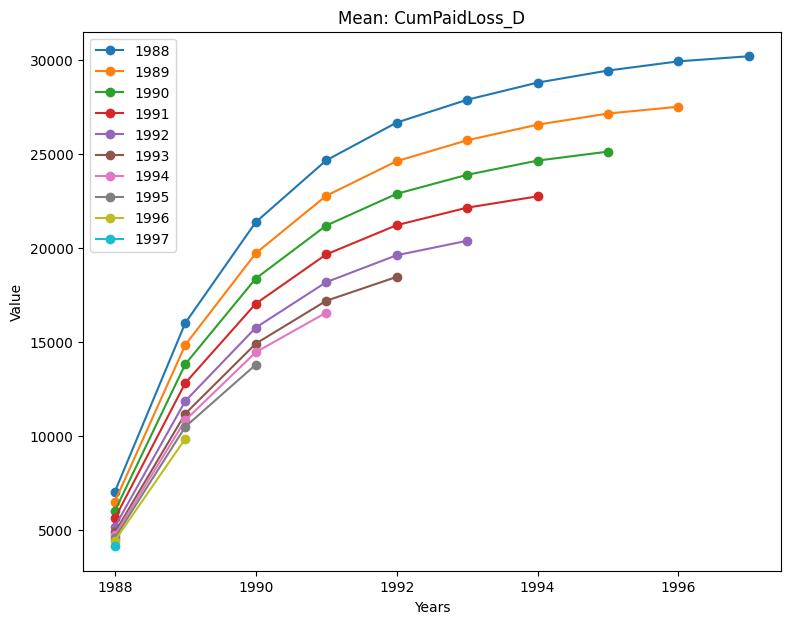

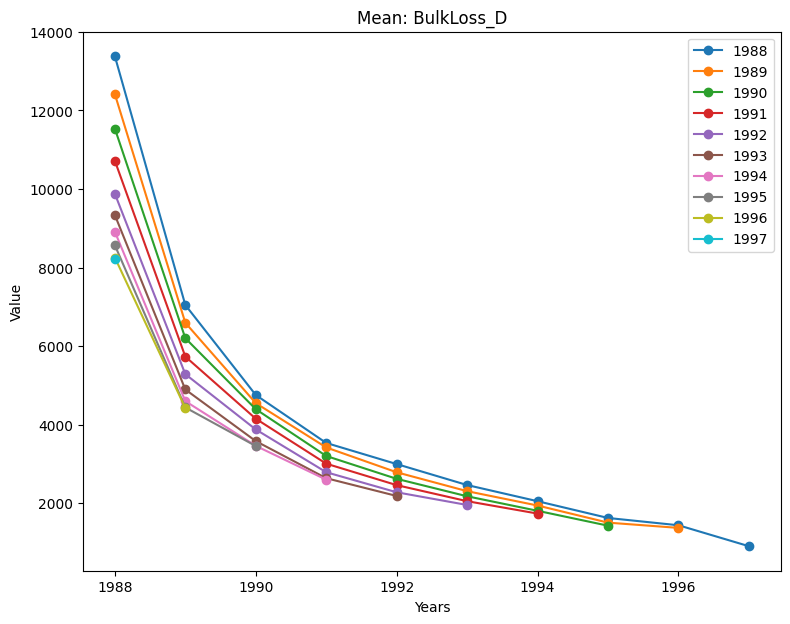

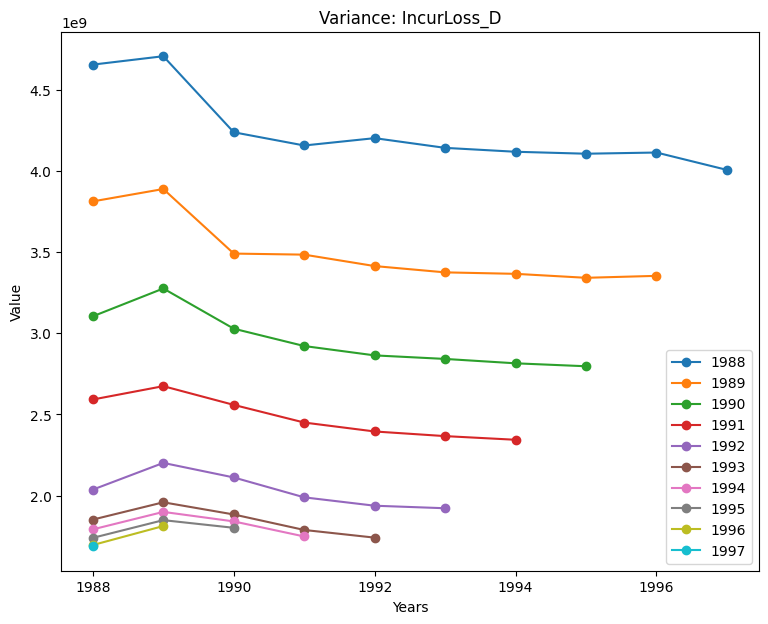

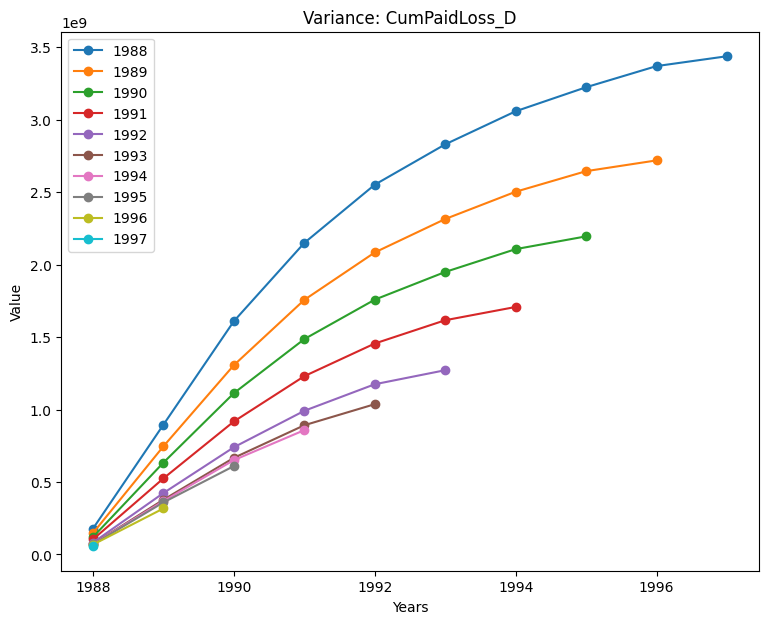

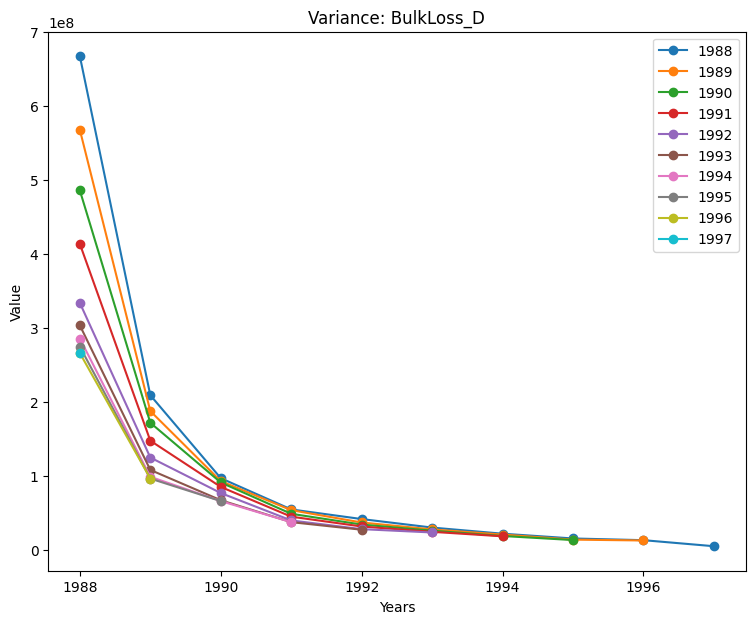

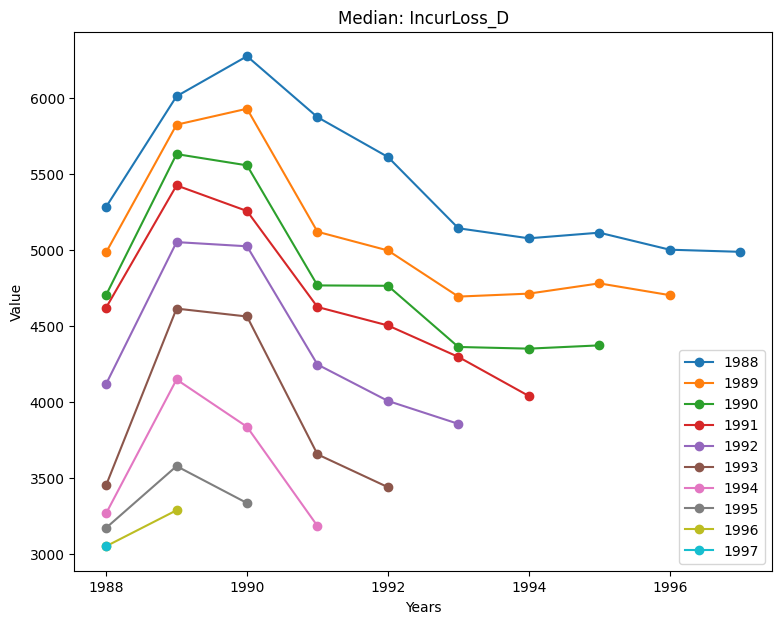

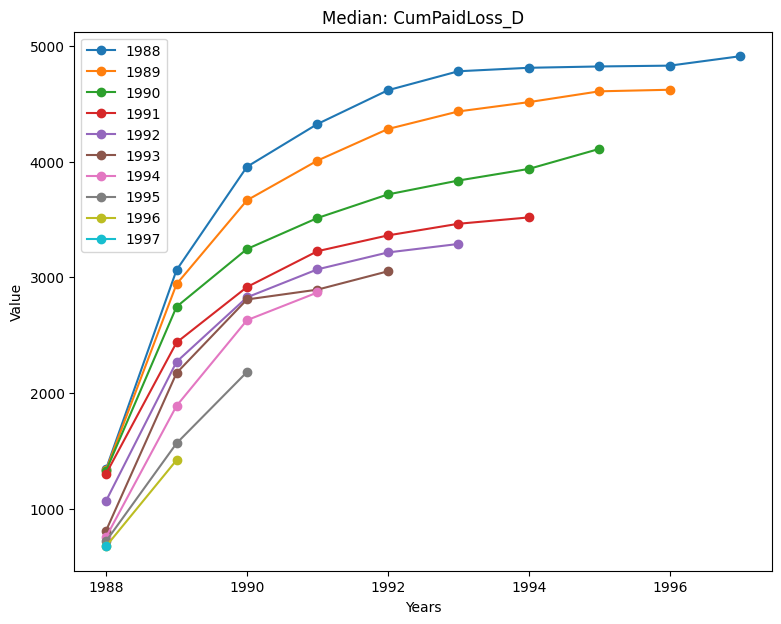

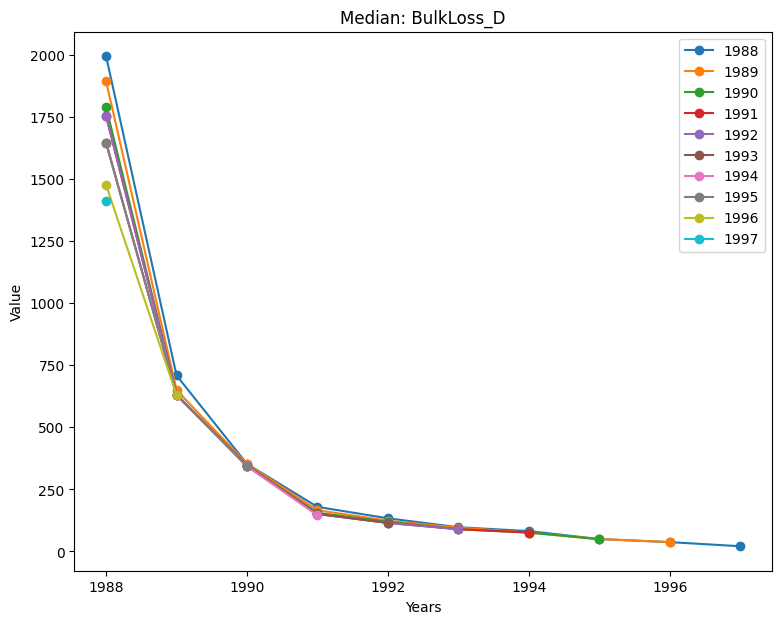

In [16]:
# Re-define the function to plot the series
def DrawGraph(x, name):
  matrix = x.values
  plt.figure(figsize=(9, 7))
  plt.plot()

  for i in range(10):
    val = matrix[i]
    for j in range(i):
      val = val[:-1]
    rang = range(1988,1988+len(val))
    plt.plot(rang, val, marker='o', linestyle='-', label=1988+i)

  plt.xlabel('Years')
  plt.ylabel('Value')
  plt.title(name)

  plt.savefig(name, dpi=300, bbox_inches='tight')

  plt.legend()

# Find the basics statistics component by component for each variable
Means_I = {}
for variable, array in Triangles.items():
  Means_I[variable] = pd.concat(array).groupby(level=0).mean()

Var_I = {}
for variable, array in Triangles.items():
  Var_I[variable] = pd.concat(array).groupby(level=0).var()

Min_I = {}
for variable, array in Triangles.items():
  Min_I[variable] = pd.concat(array).groupby(level=0).min()

Max_I = {}
for variable, array in Triangles.items():
  Max_I[variable] = pd.concat(array).groupby(level=0).max()

Median_I = {}
for variable, array in Triangles.items():
  Median_I[variable] = pd.concat(array).groupby(level=0).median()

# Export the graphs of the basis statistics
for var in Important_Variables:
  DrawGraph(Means_I[var], 'Mean: ' + var)

for var in Important_Variables:
  DrawGraph(Var_I[var], 'Variance: ' + var)

for var in Important_Variables:
  DrawGraph(Median_I[var], 'Median: ' + var)

# Models

We are going to consider two models for the prediction problem, the Chain Ladder -common in this problem- and the linear regression model.

## Chain Ladder technique

Chain Ladder Method (also known as development triangle method) is a traditional actuarial technique used in claims reserving to predict future claims costs. The method assumes that the development of claims costs over time is consistent across years and that the pattern of claims development can be predicted from past data.

Step-by-step outline of the Chain Ladder model function and its application:

1. Define a function to calculate the development factors for each diagonal of the triangle.
2. Use these factors to project the incomplete parts of the triangle.
3. Define a function to apply the Chain Ladder method to a single triangle.
4. Apply the Chain Ladder method to all triangles in the dataset.
5. Store all completed triangles.
6. Evaluate the performance of the model using an appropriate measure, such as the mean absolute error between the projected values and the actual values (for the parts of the triangle that are complete).

In [13]:
def calculate_chain_ladder_factors(triangle):
    """
    Calcula los factores de desarrollo del método de chain ladder.
    """
    factors = []
    for i in range(triangle.shape[1]-1):
        numerator = triangle.iloc[:, i+1:].sum().sum()
        denominator = triangle.iloc[:, i:-1].sum().sum()
        factors.append(numerator / denominator if denominator != 0 else 1)
    return factors

def complete_triangle(triangle):
    """
    Completa un triángulo de datos usando el método de chain ladder.
    """
    # Calcula los factores de desarrollo
    factors = calculate_chain_ladder_factors(triangle)

    n_rows, n_cols = triangle.shape

    # Itera sobre las filas y columnas para completar los valores faltantes
    for i in range(n_rows):
        for j in range(n_cols - i, n_cols):
            if j == n_cols - 1:
                # Usa el factor de desarrollo para proyectar el siguiente valor
                triangle.iloc[i, j] = triangle.iloc[i, j - 1] * factors[j - 1]
            else:
                # Copia el valor de la fila anterior
                triangle.iloc[i, j] = triangle.iloc[i - 1, j]

    return triangle

# Ejemplo de uso con tu Triangles
completed_triangle = complete_triangle(Triangles["IncurLoss_D"][1].copy())
print(completed_triangle)

          0         1         2         3         4         5         6  \
0  336928.0  316483.0  278496.0  303033.0  299496.0  295061.0  299251.0   
1  289198.0  311381.0  277980.0  277732.0  276563.0  278067.0  276704.0   
2  297174.0  277209.0  269739.0  272666.0  271318.0  267578.0  269592.0   
3  181796.0  205079.0  199106.0  187833.0  185663.0  184940.0  184507.0   
4  114807.0  114774.0  101460.0   98430.0   96930.0   96121.0  184507.0   
5  107934.0  107569.0   97730.0   96185.0   96124.0   96121.0  184507.0   
6  100686.0   94456.0   92314.0   92241.0   96124.0   96121.0  184507.0   
7   53381.0   51205.0   51087.0   92241.0   96124.0   96121.0  184507.0   
8    6725.0    6663.0   51087.0   92241.0   96124.0   96121.0  184507.0   
9   62679.0    6663.0   51087.0   92241.0   96124.0   96121.0  184507.0   

          7         8              9  
0  297492.0  300620.0  296626.000000  
1  281101.0  278023.0  142521.123384  
2  267745.0  278023.0  142521.123384  
3  267745.0  27802

In [17]:
def calculate_chain_ladder_factors(triangle):
    factors = []
    for i in range(triangle.shape[1] - 1):
        column_sum = triangle.iloc[:, i].sum()
        next_column_sum = triangle.iloc[:, i + 1].sum()
        if column_sum != 0:
            factors.append(next_column_sum / column_sum)
        else:
            factors.append(1)
    return factors

def complete_triangle(triangle):
    factors = calculate_chain_ladder_factors(triangle)
    n_rows, n_cols = triangle.shape

    for i in range(n_rows):
        for j in range(n_cols - i, n_cols):
            if j < n_cols - 1:
                # Para columnas no finales, usar el factor de desarrollo correspondiente
                triangle.iloc[i, j] = triangle.iloc[i, j - 1] * factors[j - 1]
            else:
                # Para la última columna, usar el último factor de desarrollo disponible
                if i > 0:
                    triangle.iloc[i, j] = triangle.iloc[i - 1, j] * factors[-1]

    return triangle

# Ejemplo de uso
completed_triangle = complete_triangle(Triangles["IncurLoss_D"][1].copy())
print(completed_triangle)


          0             1              2              3              4  \
0  336928.0  316483.00000  278496.000000  303033.000000  299496.000000   
1  289198.0  311381.00000  277980.000000  277732.000000  276563.000000   
2  297174.0  277209.00000  269739.000000  272666.000000  271318.000000   
3  181796.0  205079.00000  199106.000000  187833.000000  185663.000000   
4  114807.0  114774.00000  101460.000000   98430.000000   96930.000000   
5  107934.0  107569.00000   97730.000000   96185.000000   96124.000000   
6  100686.0   94456.00000   92314.000000   92241.000000   85155.058770   
7   53381.0   51205.00000   51087.000000   49600.900087   45790.565605   
8    6725.0    6663.00000    6138.389700    5959.826457    5501.993389   
9   62679.0   59992.58052   55269.073742   53661.319016   49539.063697   

               5              6              7              8              9  
0  295061.000000  299251.000000  297492.000000  300620.000000  296626.000000  
1  278067.000000  276704.00

In [65]:
def complete_triangle(triangle):
    factors = calculate_chain_ladder_factors(triangle)
    n_rows, n_cols = triangle.shape

    # Proyectar los valores faltantes utilizando los factores de desarrollo
    for i in range(n_rows):
        for j in range(n_cols - i, n_cols):
            # Usar el factor de desarrollo para proyectar los valores faltantes
            if j < n_cols - 1:
                triangle.iloc[i, j] = triangle.iloc[i, j - 1] * factors[j - 1]
            else:
                # Para la última columna, usar el último factor de desarrollo para proyectar el valor
                # basándose en el último valor no cero de la misma fila
                last_non_zero_value = triangle.iloc[i, :j][triangle.iloc[i, :j] != 0].iloc[-1]
                triangle.iloc[i, j] = last_non_zero_value * factors[-1]

    return triangle

# Ejemplo de uso
completed_triangle = complete_triangle(Triangles["IncurLoss_D"][1].copy())
print(completed_triangle)


          0              1              2              3              4  \
0  289198.0  244640.129065  202739.036058  166132.521555  131868.977206   
1  297174.0  277209.000000  234498.321350  194334.281173  159245.327311   
2  181796.0  205079.000000  199106.000000  168428.957107  139581.043138   
3  114807.0  114774.000000  101460.000000   98430.000000   83264.503571   
4  107934.0  107569.000000   97730.000000   96185.000000   96124.000000   
5  100686.0   94456.000000   92314.000000   92241.000000   92929.000000   
6   53381.0   51205.000000   51087.000000   51015.000000       0.000000   
7    6725.0    6663.000000    6473.000000       0.000000       0.000000   
8   62679.0   64000.000000       0.000000       0.000000       0.000000   
9   62058.0       0.000000       0.000000       0.000000       0.000000   

               5             6             7             8             9  
0  102194.404555  80279.008635  61234.072482  44922.709287  31389.393392  
1  126402.213371  97957.

In [48]:
print(Triangles["IncurLoss_D"][0])


          0              1              2              3              4  \
0  367404.0  312231.945572  257108.750231  207432.736667  163720.304602   
1  336928.0  316483.000000  268957.612956  221474.313289  178683.233711   
2  289198.0  311381.000000  277980.000000  236236.503223  194529.973515   
3  297174.0  277209.000000  269739.000000  272666.000000  231720.492078   
4  181796.0  205079.000000  199106.000000  187833.000000  185663.000000   
5  114807.0  114774.000000  101460.000000   98430.000000   96930.000000   
6  107934.0  107569.000000   97730.000000   96185.000000       0.000000   
7  100686.0   94456.000000   92314.000000       0.000000       0.000000   
8   53381.0   51205.000000       0.000000       0.000000       0.000000   
9    6725.0       0.000000       0.000000       0.000000       0.000000   

               5              6              7             8             9  
0  127128.958795   98955.513271   74888.482134  54834.842907  38647.266298  
1  141029.202626  10

In [ ]:
pd.DataFrame(full_data)

,0,1,2,3,4,5,6,7,8,9
0,367404.000000,362988.0,347288.0,330648.0,354690.0,350092.0,346808.0,349124.0,348157.0,347762.0
1,336928.000000,316483.0,278496.0,303033.0,299496.0,295061.0,299251.0,297492.0,300620.0,0.0
2,289198.000000,311381.0,277980.0,277732.0,276563.0,278067.0,276704.0,281101.0,0.0,0.0
3,297174.000000,277209.0,269739.0,272666.0,271318.0,267578.0,269592.0,0.0,0.0,0.0
4,181796.000000,205079.0,199106.0,187833.0,185663.0,184940.0,0.0,0.0,0.0,0.0
5,114807.000000,114774.0,101460.0,98430.0,96930.0,0.0,0.0,0.0,0.0,0.0
6,107934.000000,107569.0,97730.0,96185.0,0.0,0.0,0.0,0.0,0.0,0.0
7,100686.000000,94456.0,92314.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,53381.000000,51205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6725.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Triangles.keys()

dict_keys(['IncurLoss_D', 'CumPaidLoss_D', 'BulkLoss_D'])

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error

def calculate_development_factors(triangle):
    """
    Calculate the average development factors for a given loss triangle.
    """
    factors = []
    for i in range(triangle.shape[0] - 1):
        development = triangle.iloc[i, :i+1] / triangle.iloc[i+1, :i+1]
        factor = development[development != np.inf].mean()
        factors.append(factor)
    return factors

def complete_triangle(triangle, factors):
    """
    Complete the triangle using the calculated development factors.
    """
    completed_triangle = triangle.copy()
    for i in range(completed_triangle.shape[0]):
        for j in range(completed_triangle.shape[1] - i):
            if pd.isnull(completed_triangle.iat[i, j]):
                completed_triangle.iat[i, j] = completed_triangle.iat[i, j-1] * factors[j-1]
    return completed_triangle

def chain_ladder_method(triangle):
    """
    Apply the Chain Ladder method to project a loss triangle.
    """
    # Calculate development factors excluding the last diagonal
    factors = calculate_development_factors(triangle.iloc[:-1])

    # Complete the triangle
    completed_triangle = complete_triangle(triangle, factors)

    return completed_triangle

def evaluate_model(actual_triangle, predicted_triangle):
    """
    Evaluate the model by calculating the mean absolute error between
    the actual and predicted values of the last diagonal.
    """
    actual_values = actual_triangle.iloc[-1, :-1]
    predicted_values = predicted_triangle.iloc[-1, :-1]
    return mean_absolute_error(actual_values, predicted_values)

# Assuming DataComplete contains all initial triangles, with the structure:
# DataComplete = {'IncurLoss_D': [triangle1, triangle2, ...], 'CumPaidLoss_D': [...], ...}
completed_triangles = {}
evaluation_results = {}

for variable, triangles in DataComplete.items():
    completed_triangles[variable] = []
    evaluation_results[variable] = []
    for triangle in triangles:
        # We assume the last diagonal of the triangle is unknown for evaluation
        actual_triangle = triangle.copy()
        # Removing the last diagonal for the model to predict
        triangle_to_predict = actual_triangle.iloc[:-1, :-actual_triangle.shape[0]]
        predicted_triangle = chain_ladder_method(triangle_to_predict)
        completed_triangle = pd.concat([predicted_triangle, actual_triangle.tail(1)], ignore_index=True)
        completed_triangles[variable].append(completed_triangle)
        evaluation_results[variable].append(evaluate_model(actual_triangle, completed_triangle))

# Output the evaluation results
#evaluation_results


## Regresión Lineal

In [ ]:
ejemplo = Triangles['IncurLoss_D'][0]

In [ ]:
ejemplo

,0,1,2,3,4,5,6,7,8,9
0,367404.0,362988.0,347288.0,330648.0,354690.0,350092.0,346808.0,349124.0,348157.0,347762.0
1,336928.0,316483.0,278496.0,303033.0,299496.0,295061.0,299251.0,297492.0,300620.0,0.0
2,289198.0,311381.0,277980.0,277732.0,276563.0,278067.0,276704.0,281101.0,0.0,0.0
3,297174.0,277209.0,269739.0,272666.0,271318.0,267578.0,269592.0,0.0,0.0,0.0
4,181796.0,205079.0,199106.0,187833.0,185663.0,184940.0,0.0,0.0,0.0,0.0
5,114807.0,114774.0,101460.0,98430.0,96930.0,0.0,0.0,0.0,0.0,0.0
6,107934.0,107569.0,97730.0,96185.0,0.0,0.0,0.0,0.0,0.0,0.0
7,100686.0,94456.0,92314.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,53381.0,51205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6725.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
